In [1]:
import logomaker
import pickle
import math
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters_logos(clusters, rows):
    n = len(clusters)
    print(len(rows))
    fig = plt.figure(figsize=(10,30), constrained_layout= True)
    for i, cluster in enumerate(clusters):
        ax1 = plt.subplot2grid((n,4), (i,0), colspan=3)
        peptides = clusters[cluster]
        peptides_matrix = logomaker.alignment_to_matrix(sequences = peptides, to_type="probability")

        lm = logomaker.Logo(
            peptides_matrix,
            fade_probabilities = True,
            stack_order= "small_on_top",
            ax=ax1
        )

        #Highlight strongest 4 signals
        tops = []
        for j, x in enumerate(peptides_matrix.idxmax(axis=1)):
            y = max(peptides_matrix.iloc[j])
            tops.append((j, x, y))
        tops = sorted(tops, key=lambda x: x[2], reverse=True)
        to_highlight = [x[0] for x in tops[:4]]
        #print(to_highlight)
        for t in to_highlight:
            #print(t)
            lm.highlight_position(t)
        
        # lm.highlight_position(1)
        # lm.highlight_position(8)
        


        ax1.set_title(f"cluster title: {cluster} \n number of peptides: {len(peptides)}")
        ax1.set_ylabel("probability")
        ax1.set_xlabel("residue number")

        positive_entries = [float(row[4]) for row in rows if row[1] in peptides and float(row[4]) < 500]
        negative_entries = [float(row[4]) for row in rows if row[1] in peptides and float(row[4]) > 500]
        ax2 = plt.subplot2grid((n,4), (i,3))
        ax2.bar(["Positive", "Negative"], [len(positive_entries), len(negative_entries)])
        ax2.set_title(f" {len(positive_entries)/len(negative_entries):.2f} pos/neg ratio \n At BA < 500")
    plt.show()

#plot_clusters_logos(clusters, rows)

In [2]:

with open("/projects/0/einf2380/data/external/processed/II/IDs_BA_MHCII.csv", "r") as csv_f:
    rows = [row.replace("\n", "").split(",") for row in csv_f];
    print(len(rows))


108836


108836


LogomakerError: sequences must be a list, tuple, np.ndarray, or pd.Series.

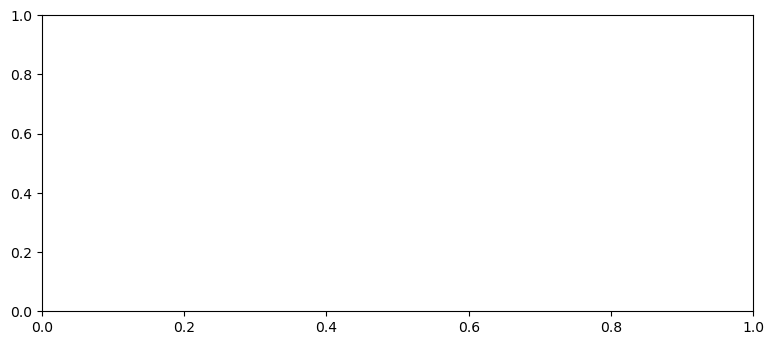

In [6]:
#Load and plot standard clusters
clusters = pickle.load(open("/projects/0/einf2380/data/external/processed/II/IDs_BA_MHCII_PAM250_10_gibbscluster_clusters.pkl", "rb"))

plot_clusters_logos(clusters, rows)

108836


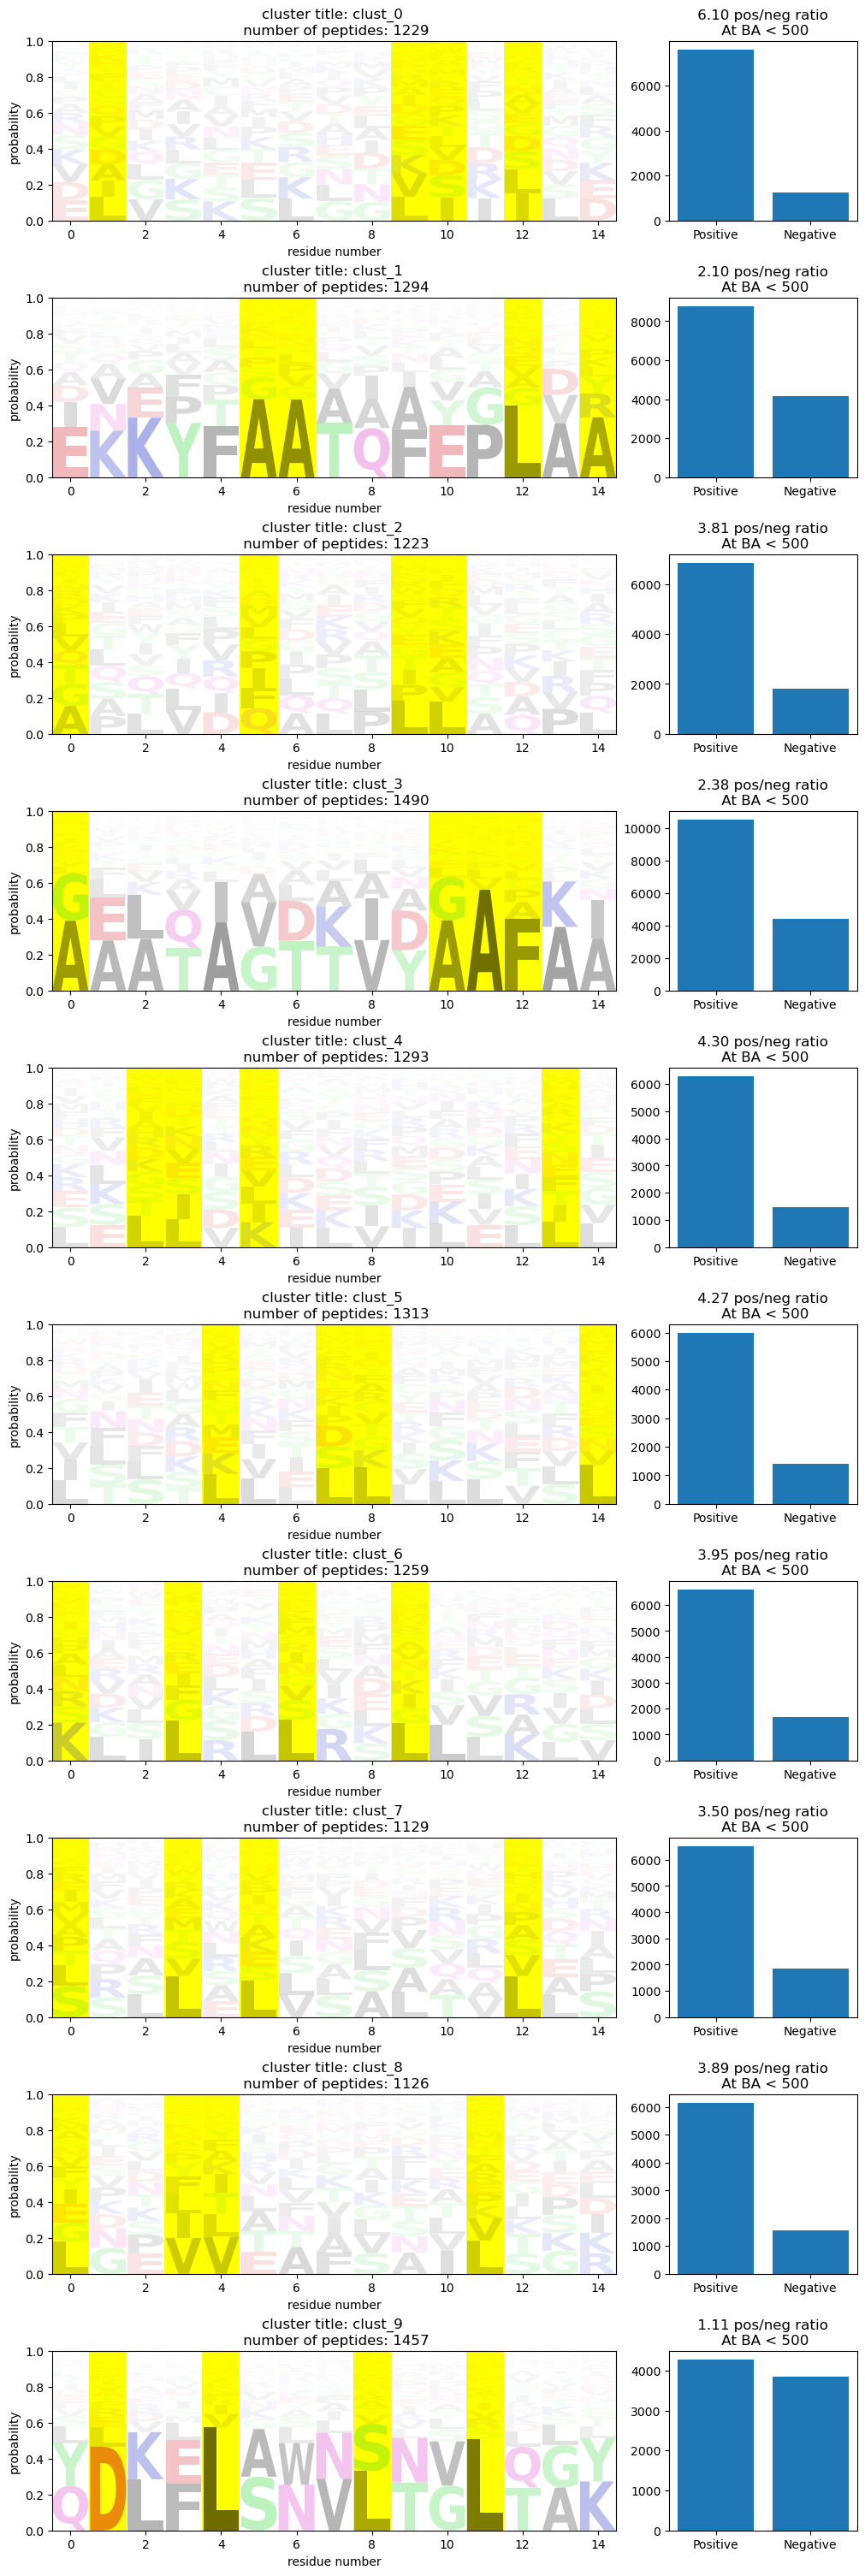

In [8]:
#Load and plot gibbs clusters

clusters = pickle.load(open('../../data/external/processed/IDs_BA_MHCII_PAM250_10_gibbscluster_clusters.pkl', 'rb'))
clusters = {x : clusters[x]['cores'] for x in clusters}

plot_clusters_logos(clusters, rows)

In [20]:
n = len(clusters)
for i, cluster in enumerate(clusters):
    peptides = clusters[cluster]
    peptides_matrix = logomaker.alignment_to_matrix(sequences = peptides, to_type="probability")
    tops = []
    for i, x in enumerate(peptides_matrix.idxmax(axis=1)):
        y = max(peptides_matrix.iloc[i])
        tops.append((i, x, y))
    tops = sorted(tops, key=lambda x: x[2])
    to_highlight = [x[0] for x in tops[:4]]
    print
    break

[(3, 'Y', 0.14684684684684685), (8, 'I', 0.15675675675675677), (7, 'K', 0.159009009009009), (11, 'A', 0.1608108108108108), (9, 'D', 0.1621621621621622), (6, 'A', 0.16621621621621618), (5, 'A', 0.16666666666666666), (14, 'A', 0.1671171171171171), (1, 'K', 0.16846846846846847), (0, 'G', 0.17162162162162165), (13, 'K', 0.17837837837837842), (4, 'I', 0.18063063063063062), (10, 'A', 0.1810810810810811), (2, 'L', 0.1896396396396396), (12, 'L', 0.21891891891891888)]
